In [1]:
#Team, I am still working on this...made a mess of it earlier, started over and will circle back to finish. 

In [18]:
!pip install yfinance as yf

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import numpy as np
import yfinance as yf

In [21]:
combo_multi_path = "/Users/chelseaconrad/Desktop/Final_Project_WSB/Data/combo_count_multiindex.csv"
ticker_path = "/Users/chelseaconrad/Desktop/Final_Project_WSB/Data/final_ticker_list.csv"

In [22]:
count_df = pd.read_csv(combo_multi_path, header=[0,1], index_col=0)
ticker_list = pd.read_csv(ticker_path)

In [23]:
ticker_list = ticker_list["Tickers"].to_list()

In [24]:
count_df.head()

,AMC,PUBM,GOGO,ISUN,CLVS,GME,SKT,LGND,TRIT,ESPR,...,JP,AAPL,ET,MSM,FB,TLRY,BRO,CRSR,IBKR,BIO
,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,...,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,11.0,2.0,6.0,0.0,0.0,1841.0,0.0,0.0,0.0,0.0,...,4.0,88.0,136.0,0.0,11.0,1.0,84.0,46.0,5.0,2.0
2020-12-09,2.0,31.0,6.0,0.0,0.0,1938.0,0.0,0.0,0.0,1.0,...,69.0,213.0,281.0,0.0,168.0,3.0,164.0,91.0,11.0,8.0
2020-12-10,26.0,3.0,1.0,0.0,0.0,591.0,1.0,0.0,2.0,0.0,...,63.0,114.0,242.0,4.0,159.0,1.0,135.0,52.0,8.0,13.0
2020-12-11,15.0,3.0,0.0,0.0,0.0,428.0,2.0,2.0,0.0,0.0,...,23.0,114.0,249.0,9.0,54.0,0.0,194.0,103.0,18.0,13.0
2020-12-12,34.0,0.0,1.0,0.0,0.0,269.0,0.0,0.0,0.0,0.0,...,18.0,71.0,165.0,0.0,35.0,0.0,144.0,42.0,15.0,11.0


In [25]:
df = pd.DataFrame(yf.download(ticker_list, start="2020-12-08", end="2021-02-05", interval="1d", group_by='tickers', index=False))

[*********************100%***********************]  82 of 82 completed


In [26]:
amc_count = pd.DataFrame(count_df["AMC"])

In [27]:
amc_price = df["AMC"]

In [28]:
# enter combined AMC df info
amc_result = amc_count.join(amc_price)
amc_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.020000,3.61,3.98,3.98,2.953060e+07
2020-12-09,2.0,4.22,4.330000,3.75,3.86,3.86,2.099120e+07
2020-12-10,26.0,3.79,4.100000,3.77,4.09,4.09,1.987280e+07
2020-12-11,15.0,4.04,4.250000,3.87,3.92,3.92,2.231040e+07
2020-12-12,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,47.0,4.01,4.010000,3.00,3.19,3.19,6.715900e+07
2020-12-15,67.0,3.24,3.240000,2.76,2.86,2.86,5.443210e+07
2020-12-16,67.0,2.87,2.890000,2.72,2.78,2.78,2.542320e+07


In [29]:
amc_result['datetime']=amc_result.index.to_pydatetime()
amc_result["Year"]=amc_result['datetime'].dt.year
amc_result["Month"]=amc_result['datetime'].dt.month
amc_result["Day"]=amc_result['datetime'].dt.day
# amc_result['date2']=amc_result.index
amc_result.head()

,mentions,Open,High,Low,Close,Adj Close,Volume,datetime,Year,Month,Day
date,,,,,,,,,,,
2020-12-08,11.0,3.61,4.02,3.61,3.98,3.98,29530600.0,2020-12-08,2020,12,8
2020-12-09,2.0,4.22,4.33,3.75,3.86,3.86,20991200.0,2020-12-09,2020,12,9
2020-12-10,26.0,3.79,4.10,3.77,4.09,4.09,19872800.0,2020-12-10,2020,12,10
2020-12-11,15.0,4.04,4.25,3.87,3.92,3.92,22310400.0,2020-12-11,2020,12,11
2020-12-12,34.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-12,2020,12,12


In [30]:
# #add "Day","Month","Year"
# amc_result=amc_result[["High","Open","Low","Close"]]
# amc_result.head(10)

In [32]:
amc_result.interpolate(method ='linear', limit_direction ='forward') 

,mentions,Open,High,Low,Close,Adj Close,Volume,datetime,Year,Month,Day
date,,,,,,,,,,,
2020-12-08,11.0,3.610000,4.020000,3.610000,3.980000,3.980000,2.953060e+07,2020-12-08,2020,12,8
2020-12-09,2.0,4.220000,4.330000,3.750000,3.860000,3.860000,2.099120e+07,2020-12-09,2020,12,9
2020-12-10,26.0,3.790000,4.100000,3.770000,4.090000,4.090000,1.987280e+07,2020-12-10,2020,12,10
2020-12-11,15.0,4.040000,4.250000,3.870000,3.920000,3.920000,2.231040e+07,2020-12-11,2020,12,11
2020-12-12,34.0,4.030000,4.170000,3.580000,3.676667,3.676667,3.725993e+07,2020-12-12,2020,12,12
2020-12-13,12.0,4.020000,4.090000,3.290000,3.433333,3.433333,5.220947e+07,2020-12-13,2020,12,13
2020-12-14,47.0,4.010000,4.010000,3.000000,3.190000,3.190000,6.715900e+07,2020-12-14,2020,12,14
2020-12-15,67.0,3.240000,3.240000,2.760000,2.860000,2.860000,5.443210e+07,2020-12-15,2020,12,15
2020-12-16,67.0,2.870000,2.890000,2.720000,2.780000,2.780000,2.542320e+07,2020-12-16,2020,12,16


In [46]:
#Separate Indepentdent and dependent variable
# X = amc_result.iloc[:amc_result.columns="Close"]
# Y = amc_result.iloc[:, 5]

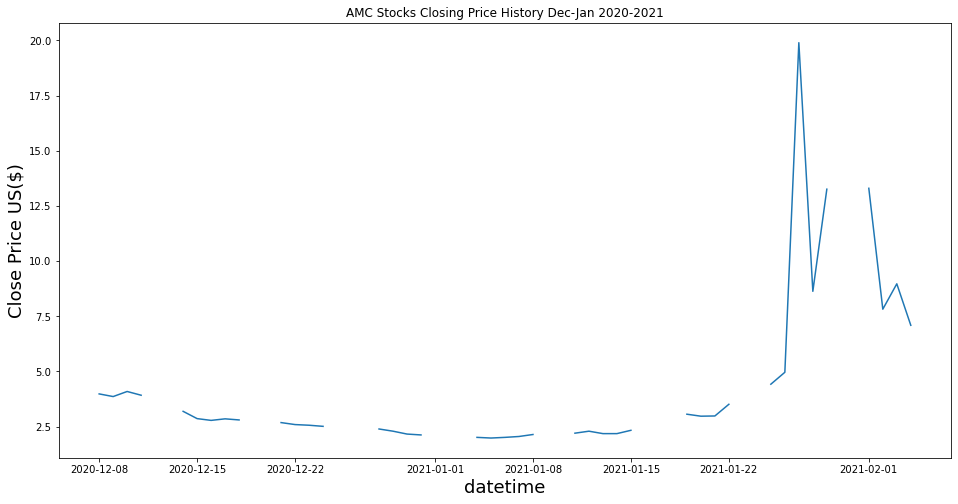

In [69]:
plt.figure(figsize=(16,8))
plt.title('AMC Stocks Closing Price History Dec-Jan 2020-2021')
plt.plot(amc_result['datetime'],amc_result['Close'])
plt.xlabel('datetime',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

In [65]:
x = amc_result.iloc[:, 0:1].values
y = amc_result.iloc[:, 1]

In [66]:
print(X.shape)
print(Y.shape)

(58, 11)
(4, 11)


In [67]:
#Split to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

ValueError: Found input variables with inconsistent numbers of samples: [58, 4]

In [ ]:
# print(x_train.shape)
# print(x_test.shape)  
# print(y_train.shape) 
# print(y_test.shape) 
# #y_test to be evaluated with y_pred for Diff models

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

In [ ]:
y_pred=lr_model.predict(x_test)

In [ ]:
#Linear Model Cross-Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100

In [ ]:
#Plot actual vs predicted
plot_df=pd.DataFrame({‘Actual’:y_test,’Pred’:y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()